<a href="https://colab.research.google.com/github/diascarolina/i2a2/blob/main/exercise04/problem04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Family Clustering Using Genes

How can we know if a person is related to someone else? Families have similar genetic backgrounds [[1]](https://medlineplus.gov/genetics/understanding/inheritance/familyhistory/), so we can use our data science skills to group people by their genes, and see if there is a reasonable connection between them to consider them as the same family. That's what we're going to achieve in this problem.

Working with biological data is a very delicate problem, so it is expected that most of the data preparation necessary up to the point of clustering is made by people with expertise in the field, so as not to create false assumptions. And the algorithm's part is left to the data scientists. Let's get to it!

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections

from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift

# 01 Data Understanding & EDA

In [34]:
data_url = "https://github.com/diascarolina/i2a2/blob/main/exercise04/readcounts.xlsx?raw=true"

raw_data = pd.read_excel(data_url)

In [35]:
raw_data.head()

,Unnamed: 0,H223,H224,H225,H226,H227,H228,H229,H230,H231,...,H261,H262,H263,H264,H265,H266,H267,H268,H269,H270
0,ENSG00000000003,0,0,0,1,0,0,0,0,1,...,0,1,0,1,0,2,0,0,1,0
1,ENSG00000000005,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,ENSG00000000419,1216,1228,1022,912,491,449,466,727,774,...,980,932,360,450,484,926,803,630,537,582
3,ENSG00000000457,189,114,110,289,186,148,169,258,145,...,117,286,137,90,105,275,101,56,87,81
4,ENSG00000000460,74,38,55,127,30,17,45,100,33,...,28,157,34,20,15,139,54,25,21,47


In [36]:
raw_data.set_index(["Unnamed: 0"], inplace=True)

In [37]:
raw_data.head()

,H223,H224,H225,H226,H227,H228,H229,H230,H231,H232,...,H261,H262,H263,H264,H265,H266,H267,H268,H269,H270
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,0,0,0,1,0,0,0,0,1,0,...,0,1,0,1,0,2,0,0,1,0
ENSG00000000005,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
ENSG00000000419,1216,1228,1022,912,491,449,466,727,774,576,...,980,932,360,450,484,926,803,630,537,582
ENSG00000000457,189,114,110,289,186,148,169,258,145,131,...,117,286,137,90,105,275,101,56,87,81
ENSG00000000460,74,38,55,127,30,17,45,100,33,8,...,28,157,34,20,15,139,54,25,21,47


Here, the columns, ranging from H223 to H270, represent humans. And the rows represents genes. Let's check how many we have.

In [38]:
print(f"Numer of genes: {raw_data.shape[0]}")
print(f"Numer of humans: {raw_data.shape[1]}")

Numer of genes: 65215
Numer of humans: 48


Do we have missing data?

In [39]:
print(f'We have {raw_data.isnull().sum().sum()} null values in this dataset.')

We have 0 null values in this dataset.


Again, seeing as this is highly sensitive data, we cannot be sure if we can remove or reduce the data without an expert in the field. So we'll try to group the values as best as possible using what we already have here.

# 02 Modelling

We don't know beforehand how many clusters we want to group our data into, so it's best to use algorithms that don't have "number of clusters" as a user set parameter.

In [40]:
X = raw_data.T

## 2.1 K-means Clustering

Let's see if we can find an optimal number of clusters for the K-means algorithm using the "Elbow" method.

Text(0, 0.5, 'WCSS')

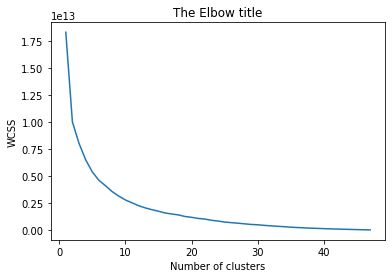

In [41]:
wcss=[]
for i in range(1, 48):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1, 48)
plt.plot(number_clusters, wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

Since the algorithm seems to stabilize after about 25 clusters (or families) we won't use it for now. Let's first check if we have better results using other algorithms.

## 2.2 Affinity Propagation Clustering

In [42]:
model_ap = AffinityPropagation()
model_ap.fit(X)
num_of_clusters = model_ap.cluster_centers_indices_.shape[0]
print(f"Number of clusters (number of families): {num_of_clusters}")

Number of clusters (number of families): 6


In [43]:
# dataframe that correlates each pearson with a family (represented by a number)
ap_df = pd.DataFrame(columns = ['person', 'family_number'])
ap_df.person = X.index
ap_df.family_number = model_ap.labels_
ap_df

,person,family_number
0,H223,0
1,H224,0
2,H225,0
3,H226,4
4,H227,2
5,H228,1
6,H229,1
7,H230,4
8,H231,2
9,H232,5


In [44]:
# count of how many people per family
ap_df.groupby(by='family_number').count()

,person
family_number,
0,12
1,4
2,9
3,7
4,12
5,4


## 2.3 DBSCAN Clustering

In [45]:
model_dbscan = DBSCAN(eps=0.5, min_samples=1) # try with 2

model_dbscan.fit_predict(X)

num_of_clusters = model_dbscan.core_sample_indices_.shape[0]
print(f"Number of clusters (number of families): {num_of_clusters}")

Number of clusters (number of families): 48


One person per family: not ideal. So let's move on to another algorithm.

## 2.4 Mean Shift Clustering

In [46]:
model_ms = MeanShift()

model_ms.fit_predict(X)

num_of_clusters = model_ms.cluster_centers_.shape[0]
print(f"Number of clusters (number of families): {num_of_clusters}")

Number of clusters (number of families): 2


In [47]:
# dataframe that correlates each pearson with a family (represented by a number)
ms_df = pd.DataFrame(columns = ['person', 'family_number'])
ms_df.person = X.index
ms_df.family_number = model_ms.labels_
ms_df

,person,family_number
0,H223,0
1,H224,0
2,H225,0
3,H226,0
4,H227,1
5,H228,1
6,H229,1
7,H230,0
8,H231,1
9,H232,1


In [48]:
# count of how many people per family
ms_df.groupby(by='family_number').count()

,person
family_number,
0,24
1,24


# 03 Results

For the **Affinity Propagation** algorithm we have 6 families with a reasonable number of people per family. For the **Mean Shift** algorithm we have only two families with 24 people each.

So we'll choose the results given by the **Affinity Propagation** algorithm and we have the following families for each person.

In [49]:
ap_df.set_index('person', inplace=True)
ap_df.style.background_gradient(cmap="tab10")

,family_number
person,
H223,0
H224,0
H225,0
H226,4
H227,2
H228,1
H229,1
H230,4
H231,2


# 04 References

- [[1 Family Genes]](https://medlineplus.gov/genetics/understanding/inheritance/familyhistory/)

- [Ten Clustering Algorithms With Python](https://machinelearningmastery.com/clustering-algorithms-with-python/)

- [Scikit-Learn Algorithms](https://scikit-learn.org/stable/modules/clustering.html)

- [How to define the optimal number of clusters for KMeans](https://jtemporal.com/kmeans-and-elbow-method/)